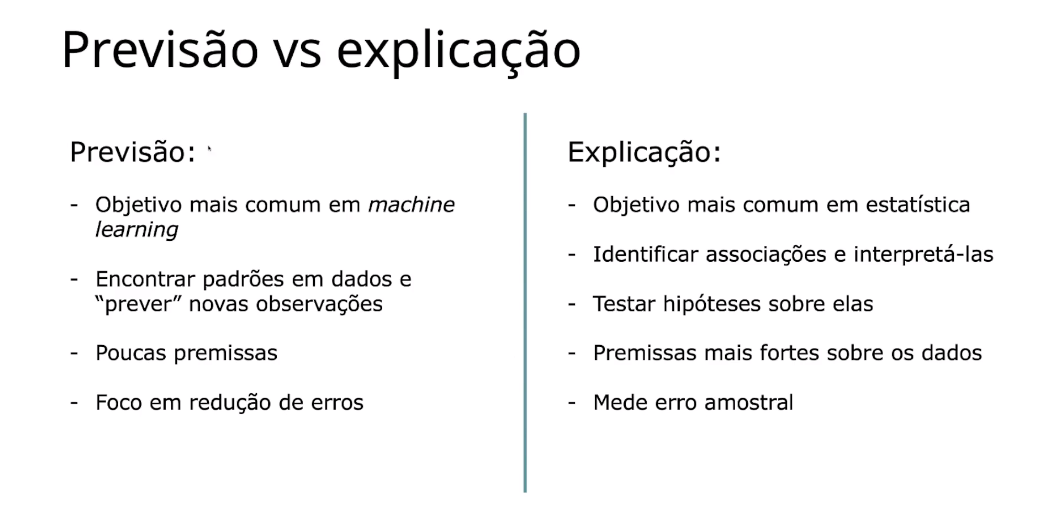

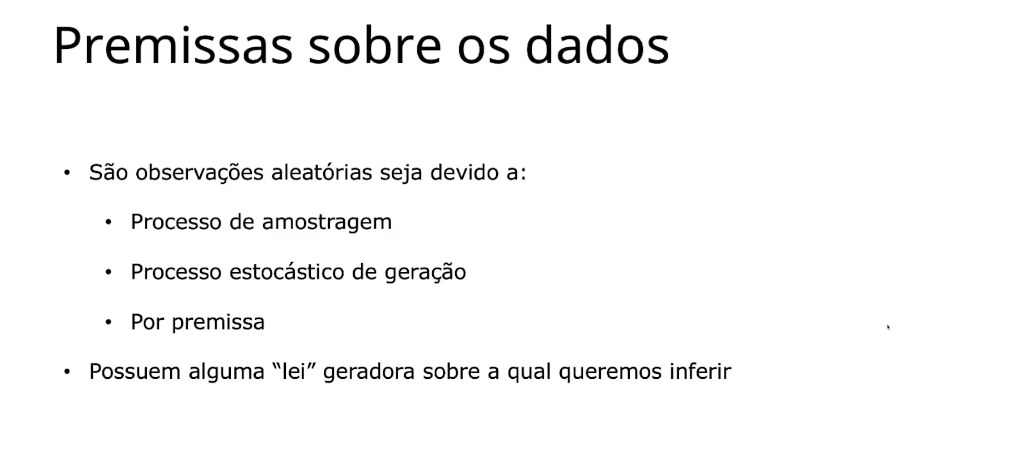

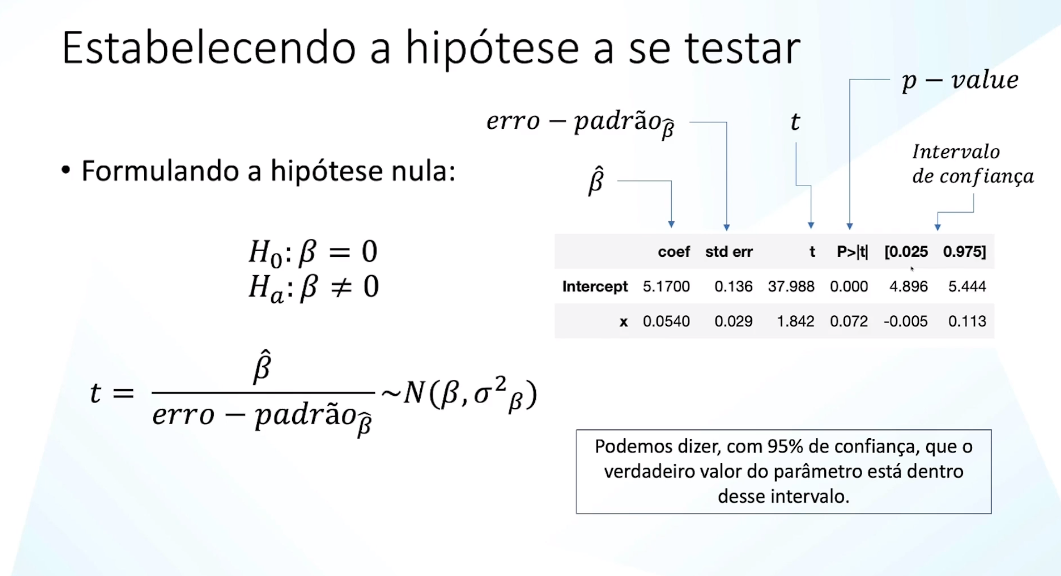

- valor-p > 5% não rejeita Ho
- valor-p < 5% rejeita Ho

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Criando o dataframe:

tips = sns.load_dataset("tips")
tips['tip_pct'] = (tips['tip'] / (tips['total_bill'] - tips['tip'])).round(2)
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Renomenado a coluna:

tips.rename(columns={"sex": "gender"}, inplace=True)

tips.head()

,total_bill,tip,gender,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.19,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.20,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.16,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.17,20.98




*   **Variáveis qualitativas na regressão:**



<Axes: xlabel='size', ylabel='tip'>

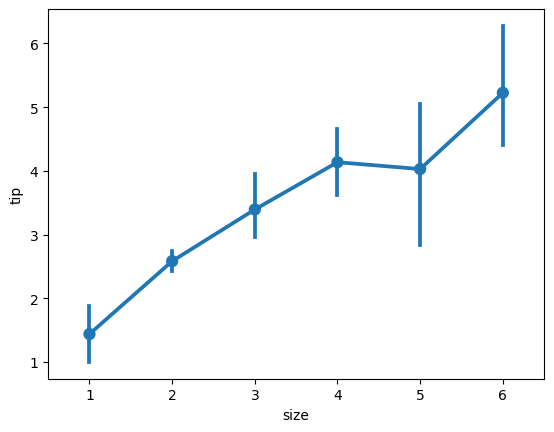

In [3]:
sns.pointplot(y = 'tip', x = 'size', data = tips)

In [4]:
y, x = patsy.dmatrices('tip ~ C(size)', data = tips)
x

DesignMatrix with shape (244, 6)
  Columns:
    ['Intercept',
     'C(size)[T.2]',
     'C(size)[T.3]',
     'C(size)[T.4]',
     'C(size)[T.5]',
     'C(size)[T.6]']
  Terms:
    'Intercept' (column 0), 'C(size)' (columns 1:6)
  (to view full data, use np.asarray(this_obj))

In [5]:
# Executando o modelo de regressão - não aparece a fórmula,
# porque ela já foi passada no patsy na célula acima, quando
# gerou a matriz de design.

sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     15.75
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           2.17e-13
Time:                        20:16:15   Log-Likelihood:                -390.09
No. Observations:                 244   AIC:                             792.2
Df Residuals:                     238   BIC:                             813.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4375      0.606      2.372      0.018       0.244       2.631
C(size)[T.2]     1.1448      0.614      1.865      0.063      -0.064       2.354
C(size)[T.3]     1.9557      0.637      3.070      0.002       0.701       3.211
C(size)[T.4]     2.6979      0.638      4.229      0.000       1.441       3.955
C(size)[T.5]     2.5905      0.813      3.186      0.002       0.989       4.192
C(size)[T.6]     3.7875      0.857      4.420      0.000       2.099       5.476
==============================================================================
Omnibus:                       77.409   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.825
Skew:                           1.344   Prob(JB):                     6.87e-54
Kurtosis:                       7.106   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

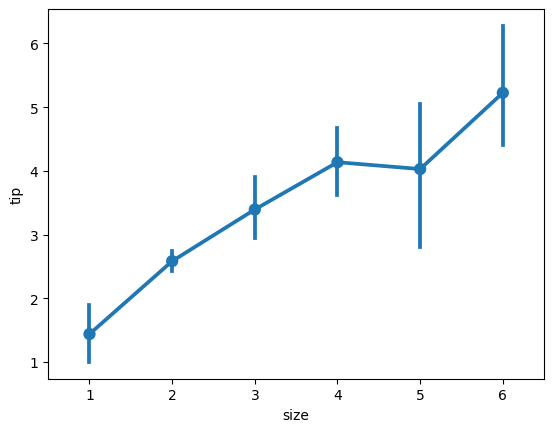

**Compreendendo a regressão linear:**

A regressão linear se constitui a partir da função:
y = a + B1*x1 + B2*x2 + B3*x3 +... Bn*xn

- y = variável resposta
- a = coeficiente linear
- B = coeficiente angular

A partir disso compreende-se que y é o produto da relação com o alpha (a) e dos betas multiplicados por um valor de x correspondente. Do mesmo modo, cada B possui um valor especifico, que irá produzir um determinado resultado em y, de tal modo que o y de B3 é y = a + B3*x3, mas por quê? Tomando como base o modelo do patsy de regressão, ele ignora os valores que não são B3, assumindo apenas esse para a construção do modelo. Vamos analisar a matriz de design abaixo para entender melhor.  

In [6]:
data = pd.DataFrame({'size': [1, 2, 3, 5, 4]})

from patsy import dmatrix
dmatrix("C(size)", data)

DesignMatrix with shape (5, 5)
  Intercept  C(size)[T.2]  C(size)[T.3]  C(size)[T.4]  C(size)[T.5]
          1             0             0             0             0
          1             1             0             0             0
          1             0             1             0             0
          1             0             0             0             1
          1             0             0             1             0
  Terms:
    'Intercept' (column 0)
    'C(size)' (columns 1:5)

In [7]:
# Tamanho das mesas:
data["size"].unique()

array([1, 2, 3, 5, 4])

Note que temos mesas que são de 1 assento até 6, porém na matriz design não mostra a mesa que possui um único assento, ao passo que ela é subentendida quando as demais mesas assumem um valor de 0. A partir disso que, no modelo de regressão, é realizado o cálculo de y para cada "B" correspondente, o qual assumirá um valor que produzirá um determinado y. Para sabermos os valores de "B", basta checar no resumo do modelo:

In [8]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     15.75
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           2.17e-13
Time:                        20:16:15   Log-Likelihood:                -390.09
No. Observations:                 244   AIC:                             792.2
Df Residuals:                     238   BIC:                             813.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4375      0.606      2.372      0.018       0.244       2.631
C(size)[T.2]     1.1448      0.614      1.865      0.063      -0.064       2.354
C(size)[T.3]     1.9557      0.637      3.070      0.002       0.701       3.211
C(size)[T.4]     2.6979      0.638      4.229      0.000       1.441       3.955
C(size)[T.5]     2.5905      0.813      3.186      0.002       0.989       4.192
C(size)[T.6]     3.7875      0.857      4.420      0.000       2.099       5.476
==============================================================================
Omnibus:                       77.409   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.825
Skew:                           1.344   Prob(JB):                     6.87e-54
Kurtosis:                       7.106   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Por exemplo, o valor do B (beta) da mesa 2 é de 1.14 aproximadamente, de tal modo que ele mais o valor de a (aplha) produziria um valor de y de aproximadamente 2.57. É assim que se chega ao valor da variável resposta, somando o aplha com o seu correspondente beta. O beta 1, por sua vez, é o próprio valor de alpha. Não obstante, o valor de cada beta é o diferencial de seu y pelo y de alpha. No contexto das gorjetas, assumir isso significa dizer que o beta 2 - referente à mesa 2 - simboliza a diferença das gorjetas da mesa com dois assentos em relação a mesa que possui apenas um assento.

Importante lembrar que os valores de Beta se referem a média das mesas, ou seja, o valor de B2 que se relaciona à média das mesas de 2 assentos.

In [9]:
# Lembrando que C(size) significa que estou categorizando a variável, que,
# em termos práticos na matriz, formará um dummie, com valores 1 e 0, simbolizando
# True ou False.

# Note que aqui estou passando como parâmetro o Treatment, colocando como valor
# o 2. Isso significa que a mesa que será parâmetro de análise será justamente
# a 2, fazendo dele o intercept do modelo - é por isso que abaixo não aparece
# a mesa 2, mas a 1 em seu lugar.

# Mas como saber qual é o melhor valor para assumir como parâmetro do modelo?
# O melhor valor para tanto será aquele que for mais frequente nos dados, pois
# desse modo estará reduzindo o erro padrão do modelo.

y, x = patsy.dmatrices('tip ~ C(size, Treatment(2))', data = tips)
x

DesignMatrix with shape (244, 6)
  Columns:
    ['Intercept',
     'C(size, Treatment(2))[T.1]',
     'C(size, Treatment(2))[T.3]',
     'C(size, Treatment(2))[T.4]',
     'C(size, Treatment(2))[T.5]',
     'C(size, Treatment(2))[T.6]']
  Terms:
    'Intercept' (column 0), 'C(size, Treatment(2))' (columns 1:6)
  (to view full data, use np.asarray(this_obj))

In [10]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     15.75
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           2.17e-13
Time:                        20:16:16   Log-Likelihood:                -390.09
No. Observations:                 244   AIC:                             792.2
Df Residuals:                     238   BIC:                             813.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.5823      0.097     26.613      0.000       2.391       2.773
C(size, Treatment(2))[T.1]    -1.1448      0.614     -1.865      0.063      -2.354       0.064
C(size, Treatment(2))[T.3]     0.8109      0.219      3.698      0.000       0.379       1.243
C(size, Treatment(2))[T.4]     1.5531      0.222      7.008      0.000       1.117       1.990
C(size, Treatment(2))[T.5]     1.4457      0.551      2.626      0.009       0.361       2.530
C(size, Treatment(2))[T.6]     2.6427      0.614      4.306      0.000       1.434       3.852
==============================================================================
Omnibus:                       77.409   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.825
Skew:                           1.344   Prob(JB):                     6.87e-54
Kurtosis:                       7.106   Cond. No.                         8.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O valor de alpha do modelo corresponde ao interceptor dele, de tal modo que os demais valores de Beta se ajustam coforme a ele. Assim, nota-se que o B1 da mesa 1 será -1.44, que é a diferença dele perante a mesa 2.

# Qualidade do modelo e complexidade:

Quando fazemos uma regressão múltipla, pelo próprio método de mínimos quadrados ordinários $(ols)$, a métrica $R^2$ vai ser necessariamente melhor sempre que adicionarmos uma variável a mais. Sempre. Por menos sentido que a variável faça, por menos informação que ela agregue, o $R^2$ vai ser maior (ou no pior extremo caso, igual) ao que tínhamos antes.

Vamos ver isso na prática na base de gorjetas:

- **AIC:**

AIC é o critério de informação de Akaike que diz que se um modelo aumentou o seu R², porém esse aumento foi motivado por uma questão aleatória, e não pela variável enquanto tal - o que para esses casos, para o percebermos, o aumento não será significativo, mas pequeno - considera-se que está havendo uma perda de informação e uma piora do modelo. Consequentemente o seu valor de AIC será elevado. Desse modo, concebe-se que quanto menor for o valor do AIC em relação a um outro modelo, melhor ele será, estando congruente com a navalha de Occam, que pode ser entendida como a resposta mais eficiente é aquela que está mais próxima da realidade.

Assim, vamos comparar o valor de AIC com os modelo gerados:

In [11]:
reg = smf.ols('tip ~ C(size, Treatment(2)) + np.log(net_bill)', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     21.03
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           9.61e-20
Time:                        20:16:16   Log-Likelihood:                -372.87
No. Observations:                 244   AIC:                             759.7
Df Residuals:                     237   BIC:                             784.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.3279      0.494     -0.664      0.508      -1.301       0.645
C(size, Treatment(2))[T.1]    -0.1059      0.599     -0.177      0.860      -1.285       1.074
C(size, Treatment(2))[T.3]     0.4012      0.216      1.859      0.064      -0.024       0.826
C(size, Treatment(2))[T.4]     0.8693      0.236      3.679      0.000       0.404       1.335
C(size, Treatment(2))[T.5]     0.6797      0.530      1.283      0.201      -0.364       1.724
C(size, Treatment(2))[T.6]     1.7283      0.593      2.914      0.004       0.560       2.897
np.log(net_bill)               1.1401      0.190      5.993      0.000       0.765       1.515
==============================================================================
Omnibus:                       74.766   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.626
Skew:                           1.303   Prob(JB):                     5.05e-51
Kurtosis:                       6.999   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
reg = smf.ols('tip ~ C(size, Treatment(2)) + np.log(net_bill) + day', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     13.96
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           6.16e-18
Time:                        20:16:16   Log-Likelihood:                -372.52
No. Observations:                 244   AIC:                             765.0
Df Residuals:                     234   BIC:                             800.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.3904      0.504     -0.775      0.439      -1.383       0.602
C(size, Treatment(2))[T.1]    -0.1007      0.605     -0.166      0.868      -1.293       1.092
C(size, Treatment(2))[T.3]     0.3880      0.221      1.757      0.080      -0.047       0.823
C(size, Treatment(2))[T.4]     0.8480      0.242      3.510      0.001       0.372       1.324
C(size, Treatment(2))[T.5]     0.6527      0.536      1.217      0.225      -0.404       1.709
C(size, Treatment(2))[T.6]     1.7578      0.604      2.911      0.004       0.568       2.947
day[T.Fri]                     0.1562      0.301      0.520      0.604      -0.436       0.749
day[T.Sat]                     0.0385      0.195      0.197      0.844      -0.346       0.423
day[T.Sun]                     0.1393      0.202      0.689      0.491      -0.259       0.537
np.log(net_bill)               1.1395      0.192      5.931      0.000       0.761       1.518
==============================================================================
Omnibus:                       75.986   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.004
Skew:                           1.318   Prob(JB):                     7.65e-53
Kurtosis:                       7.082   Cond. No.                         28.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note que o AIC do primeiro modelo é menor que o do segundo, o que significa dizer que o primeiro modelo é melhor.

- **R² Ajustado:**

O $R^2$-ajustado procura ponderar o incremento em explicação da variabilidade com o incremento em complexidade do modelo em termos de número de parâmetros. Ele aumenta se o $R^2$ aumentar mais do que o esperado "por acaso", e diminui caso contrário. Sua fórmula é a seguinte:

$$R^2_{aj} = 1- \left[ \frac{(1-R^2)(n-1)}{(n-k-1)} \right]$$


### 6. Regularização </span><a name="6"></a>
[Voltar ao índice](#topo)

Regularização (ou *model regularization*) é uma forma de considerar a complexidade adicionada ao modelo e simplificar o modelo, quer seja por deixar os parâmetros menos relevantes, quer seja por retirá-los intrgralmente do modelo.

As duas formas mais populares na literatura do aprendizado de máquina são a regularização L1 e a regularização L2:

#### Função de perda
Vamos relembrar que a nossa regressão é uma regressãod e mínimos quadrados, ou seja, estamos minimizando a função do erro quadrático médio (EQM) em função dos parâmetros do modelo ($\beta_0, \beta_1, \beta_2, ..., \beta_n$). Nossa função de erro, podemos chamá-la de um nome mais geral: *função de perda* L:

$$L = \sum_{n=1}^{N} \left( y_i - \hat{y_i} \right)^2$$

As formas de regularização mais populares introduzem uma "penalização" na função de perda devido ao aumento na complexidade do modelo - isto é, devido ao aumento do número de parâmetros (ou variáveis) no modelo.

#### Regularização L1 (lasso)
A regressão lasso introduz uma penalidade igual ao quadrado da soma dos coeficientes na função de perda:

$$L_1 = \sum_{i=1}^{N} \left( y_i - \hat{y_i} \right)^2 + \alpha \sum_{k=0}^{M} \left| \beta_k \right|$$

Em que:  
- $\beta_k$ são os parâmetros do modelo (atenção que $\beta_0$ é o intercepto).
- N é o número de observações
- M é o número de parâmetros
- $\alpha$ no statsmodels é um *hiperparâmetro* do modelo, que regula a penalidade por complexidade.

Dessa forma, minimizando essa função de perda, os parâmetros do modelo tendem a ter valor absoluto menor, e caso tragam mais complexidade que explicação da variância, são "zerados", o que significa que a variável correspondente fica é eliminada do modelo.

#### Regularização L2 (ridge)
Outra forma de regularização é a chamada regularização *ridge*, que minimiza a seguinte perda:

$$L_2 = \sum_{i=1}^{N} \left( y_i - \hat{y_i} \right)^2 + \alpha \sum_{k=0}^{M} \left| \beta_k \right|^2$$

Em que:  
- $\beta_k$ são os parâmetros do modelo (atenção que $\beta_0$ é o intercepto).
- N é o número de observações
- M é o número de parâmetros
- $\alpha$ no statsmodels é um *hiperparâmetro* do modelo, que regula a penalidade por complexidade.

Essa regularização é semelhante ao *lasso*, porém a penalização é no valor absoluto dos parâmetros. Diferente do lasso, não costuma "zerar" os parâmetros das variáveis menos relevantes, somente reduzir os coeficientes.

#### *Elastic net*
Uma forma bem popular de regularização de regressão é o *elastic net*, que consiste na mistura dos dois otimizando a seguinte função de perda:

$$L_E = \sum_{i=1}^{N} \left( y_i - \hat{y_i} \right)^2
    + \alpha \left( L1_{wt} \sum_{k=0}^{M} \left| \beta_k \right|
                    + (1-L1_{wt}) \sum_{k=0}^{M} \left( \beta_k \right)^2
             \right)$$

com:  
- N é o número de observações e M o número de parâmetros
- $\alpha$ sendo o hiperparâmetro que dá importância à penalização  
- $L1_{wt}$ sendo um número entre 0 e 1
    - quando vale 1, equivale regulaziração L1 - lasso
    - quando 0 equivale a L2 - ridge


In [13]:
modelo = 'tip ~ C(size) + np.log(net_bill) + smoker + time + day'
md = smf.ols(modelo, data = tips)

# refit = True indica que é para ele continuar até a realização do modelo, mesmo
# que na sua operação alguma variável seja zerada.

# O method se refere ao método de regularização que o modelo está se baseando.

# Li_wt = 1 indica que será mais considerado o termo que no modelo não é multi-
# plicado pelo alpha.
reg = md.fit_regularized(method = 'elastic_net'
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.01)

reg.summary()

# A partir desse novo modelo, criado com base na regularização, chega-se
# a essa tabela. É importante compreender que o R² não necessariamente será
# maior, ainda que o seu ajustado possa ser.

# Os valores que ele zera são aqueles em que não são úteis ao modelo.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     15.72
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           1.62e-18
Time:                        22:02:39   Log-Likelihood:                -372.83
No. Observations:                 244   AIC:                             763.7
Df Residuals:                     236   BIC:                             795.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0943      0.553     -0.171      0.865      -1.183       0.995
C(size)[T.2]        -0.3591      0.197     -1.819      0.070      -0.748       0.030
C(size)[T.3]              0          0        nan        nan           0           0
C(size)[T.4]         0.4563      0.256      1.782      0.076      -0.048       0.961
C(size)[T.5]              0          0        nan        nan           0           0
C(size)[T.6]         1.3854      0.610      2.270      0.024       0.183       2.588
smoker[T.No]        -0.0929      0.156     -0.596      0.552      -0.400       0.214
time[T.Dinner]       0.0376      0.185      0.203      0.839      -0.326       0.401
day[T.Fri]                0          0        nan        nan           0           0
day[T.Sat]                0          0        nan        nan           0           0
day[T.Sun]           0.1234      0.178      0.692      0.490      -0.228       0.475
np.log(net_bill)     1.1883      0.178      6.693      0.000       0.839       1.538
==============================================================================
Omnibus:                       72.687   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.153
Skew:                           1.276   Prob(JB):                     2.58e-48
Kurtosis:                       6.879   Cond. No.                         67.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""